Triangle and square waves have odd harmonics only; the sawtooth wave has both even and odd harmonics. The harmonics of the squar and sawtooth saves drop off in proportion to 1/f; the harmonics of the triangle wave drop off like 1/f^2. Can you find a waveform that has even and odd harmonics that drop off like 1/f^2?  

Hint: there are two ways you could approach this. You could construct the signal you want by adding up sinusoids, or you could start with a singla that is similar to what you want and modify it.

In [1]:
#Exercise

import os, sys

sys.path.insert(1, "D:\\ThinkDSP\\code\\")

from thinkdsp import SquareSignal, TriangleSignal, SawtoothSignal, Spectrum, decorate, SinSignal
from IPython.display import Audio
from ipywidgets import interact, fixed
import numpy as np
import matplotlib.pyplot as plt
import copy

In [68]:
sqsignal = SquareSignal(freq=440)
trsignal = TriangleSignal(freq=440)
swsignal = SawtoothSignal(freq=440)

sqperiod = sqsignal.period
trperiod = trsignal.period
swperiod = swsignal.period

sqwave = sqsignal.make_wave(duration=0.5)
trwave = trsignal.make_wave(duration=0.5)
swwave = swsignal.make_wave(duration=0.5)

sqspectrum = sqwave.make_spectrum()
trspectrum = trwave.make_spectrum()
swspectrum = swwave.make_spectrum()

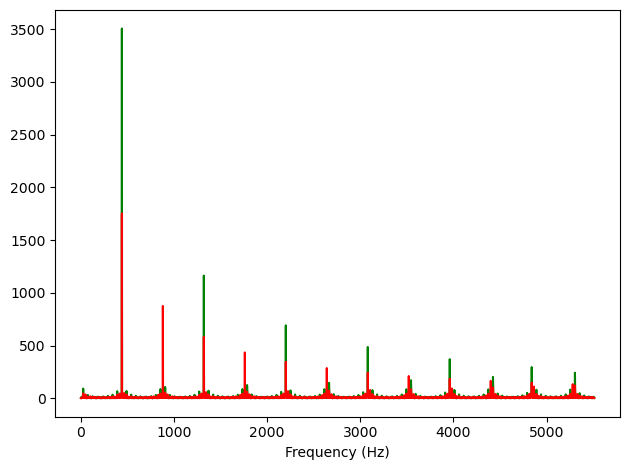

In [69]:
sqspectrum.plot(color='green')
swspectrum.plot(color='red')
#trspectrum.plot(color='blue')

decorate(xlabel='Frequency (Hz)')

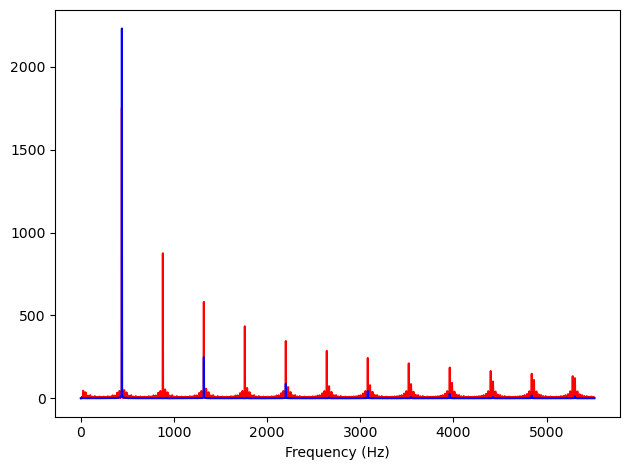

In [70]:
swspectrum.plot(color='red')
trspectrum.plot(color='blue')

decorate(xlabel='Frequency (Hz)')

Can approach two ways:  
    1. take a triangle wave and try and give it even harmonics  
    2. take a square or sawtooth wave and increase the rate at which the harmonics drop off

In [5]:
print("first harmonic: ", trspectrum.hs[440])
print("second harmonic: ", trspectrum.hs[1320])
print("third harmonic: ", trspectrum.hs[2200])
print("fourth harmonic: ", trspectrum.hs[3080])
print("fifth harmonic: ", trspectrum.hs[3960])
print("sixth harmonic: ", trspectrum.hs[4840])
print("first reflected harmonic: ", trspectrum.hs[5305])

first harmonic:  (4468.265873498421+1.9653859989295843e-12j)
second harmonic:  (496.47465781877725-1.4480491163846942e-12j)
third harmonic:  (178.73136056558405+9.606477781501672e-13j)
fourth harmonic:  (91.18983989528928+3.466936368082681e-13j)
fifth harmonic:  (55.16452274871722-1.4876513635024508e-12j)
sixth harmonic:  (36.9285667569272-1.247816216728844e-12j)
first reflected harmonic:  (26.440194436941283+4.232115179859093e-12j)


The harmonics do drop off at a rate of 1/(f^2), where f is equal to the number of the harmonic frequency (first, second, third, etc.) divided by the fundamental frequency.   

So for the second harmonic, 1320 is the 3rd multiple of the fundamental frequency, 440. 

For example, the second harmonic occurring at 1320 Hz, is 3 times the fundamental frequency (440). That makes the peak of the second harmonic (occurring at 1320) approximately the peak of the first harmonic divided by the multiple number squared.  

4468/(3^2) ~= 496  
4468/(5^2) ~= 178

In [6]:
print("first harmonic: ", sqspectrum.hs[440])
print("second harmonic: ", sqspectrum.hs[1320])
print("third harmonic: ", sqspectrum.hs[2200])
print("fourth harmonic: ", sqspectrum.hs[3080])
print("fifth harmonic: ", sqspectrum.hs[3960])
print("sixth harmonic: ", sqspectrum.hs[4840])
print("first reflected harmonic: ", sqspectrum.hs[5305])

first harmonic:  (-12.99999188025315+7018.720404989004j)
second harmonic:  (-12.999926922379615+2339.539907451709j)
third harmonic:  (-12.999797007159263+1403.6836717105462j)
fourth harmonic:  (-12.99960213564756+1002.5880452160743j)
fifth harmonic:  (-12.999342309426583+779.7459556256119j)
sixth harmonic:  (-12.999017530606075+637.9282015243595j)
first reflected harmonic:  (-12.998627801823218-539.7389363270231j)


Interestingly, the square wave has the larger portion of the peak composed on the complex side. With the square wave, it decreases at a rate of 1/f.

7018/3 ~= 2339

In [7]:
print("first harmonic: ", swspectrum.hs[440])
print("second harmonic: ", swspectrum.hs[880])
print("third harmonic: ", swspectrum.hs[1320])
print("fourth harmonic: ", swspectrum.hs[1760])
print("fifth harmonic: ", swspectrum.hs[2200])
print("sixth harmonic: ", swspectrum.hs[2640])
print("seventh harmonic: ", swspectrum.hs[3080])
print("eighth harmonic: ", swspectrum.hs[3520])
print("ninth harmonic: ", swspectrum.hs[3960])
print("tenth harmonic: ", swspectrum.hs[4400])
print("eleventh harmonic: ", swspectrum.hs[4840])
print("twelveth harmonic: ", swspectrum.hs[5280])
print("first reflected harmonic: ", swspectrum.hs[5305])

first harmonic:  (-5.0022686025406236+3510.9563910503202j)
second harmonic:  (-5.0022686025413625+1755.4746320102108j)
third harmonic:  (-5.00226860254052+1170.3124618747993j)
fourth harmonic:  (-5.002268602539847+877.7301889607395j)
fifth harmonic:  (-5.002268602541512+702.1798749298187j)
sixth harmonic:  (-5.002268602540673+585.1455403346813j)
seventh harmonic:  (-5.002268602540754+501.54890826821344j)
eighth harmonic:  (-5.002268602541154+438.85084027589613j)
ninth harmonic:  (-5.002268602542324+390.08514832658153j)
tenth harmonic:  (-5.002268602540453+351.0721196008085j)
eleventh harmonic:  (-5.0022686025409255+319.1519368491309j)
twelveth harmonic:  (-5.002268602540629+292.5513885712699j)
first reflected harmonic:  (-5.002268602541274-270.04286680490486j)


Sawtooth signals have harmonics at both even and odd multiples, but decrease like square waves at a rate of 1/f.

In [8]:
#sqspectrum.hs.sort()
#for x in range(sqspectrum.hs.size):
#    print(x, "  ", sqspectrum.hs[x])

The goal is to get a wave that has harmonics on the even and odd multiples (like a sawtooth wave), but the harmonics drop off like the triangle wave at a rate of 1/f^2

We are able to add waves like signals

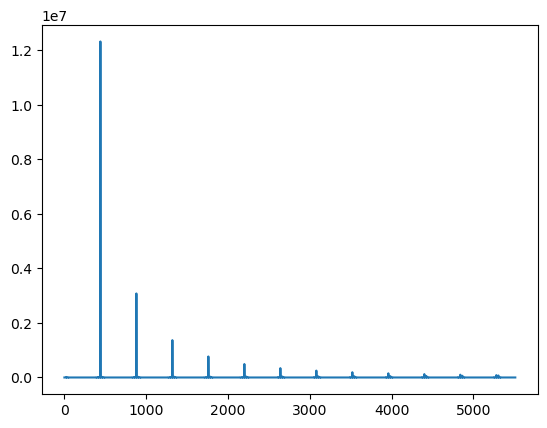

In [9]:
(swspectrum*swspectrum).plot()

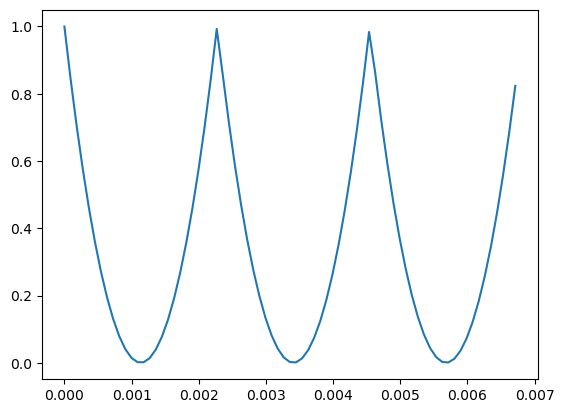

In [19]:
(swwave*swwave).segment(duration=swperiod*3).plot()

One way to achieve the intended result is to to square the spectrum, and transform it back into a wave? But I don't think that's the intended way to do achieve this.

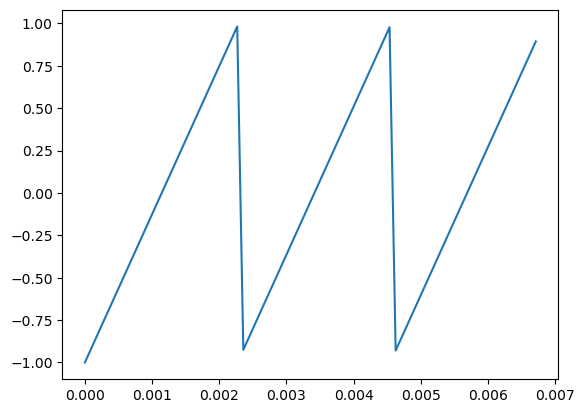

In [17]:
swsignal.plot()

In [28]:
sin1 = SinSignal(freq=440, amp=4)
sin2 = SinSignal(freq=880, amp=1)

In [32]:
sinspec = (sin1 + sin2).make_wave().make_spectrum()

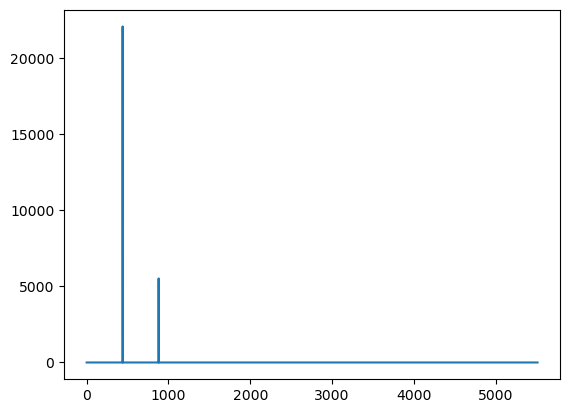

In [35]:
sinspec.plot()

Amplitude does effect the strength of the peaks